# 6.6 - Sourcing and Analyzing Time Series Data

### Importing Data and Libraries

### Subsetting Data

### Line Chart

### Time Series Analysis

### Dickey-Fuller Testing for Stationarity

### Plotting for Autocorrelation and Stationarizing Data

### Importing Data and Libraries

In [1]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# Importing Data
path = r'C:\Users\arafo\CareerFoundry\Hotel Booking Analysis'
df_bookings = pd.read_csv(os.path.join(path, '02 - Data', 'Prepared Data', 'bookings_checkedout_after_regression.csv'), index_col = False)

In [3]:
# Display all columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
df_bookings.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
2,2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


In [5]:
# Remove first column again
df_bookings = df_bookings.drop(['Unnamed: 0'], axis = 1)

In [6]:
df_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


In [7]:
df_bookings.shape

(61797, 33)

In [8]:
df_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
average_daily_rate                

In [9]:
# convert date datatype to datetime
df_bookings['reservation_status_date']=pd.to_datetime(df_bookings['reservation_status_date'], infer_datetime_format=True)

In [10]:
df_bookings.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
booking_changes                            int64
deposit_type        

### Subsetting Data

In [11]:
# Make a subset of data taking total number of guests per day
df_totalguests = df_bookings[['reservation_status_date','total_guests']]

In [12]:
df_totalguests.head()

,reservation_status_date,total_guests
0,2015-07-01,2
1,2015-07-01,2
2,2015-07-03,2
3,2015-07-03,2
4,2015-07-05,2


In [13]:
df_totalguests.shape

(61797, 2)

In [14]:
# Sum dates and total_guests together
df_totalguests = df_totalguests.groupby(by=['reservation_status_date']).sum().reset_index()

In [15]:
df_totalguests.head()

,reservation_status_date,total_guests
0,2015-07-01,6
1,2015-07-02,7
2,2015-07-03,26
3,2015-07-04,18
4,2015-07-05,61


In [16]:
df_totalguests.shape

(805, 2)

In [18]:
# Set the "Date" column as the index

from datetime import datetime

df_totalguests['datetime'] = pd.to_datetime(df_totalguests['reservation_status_date']) # Create a datetime column from "Reservation Date.
df_totalguests = df_totalguests.set_index('datetime') # Set the datetime as the index of the dataframe.
df_totalguests.drop(['reservation_status_date'], axis=1, inplace=True) # Drop the "Reservation Date" column.
df_totalguests.head()

,total_guests
datetime,
2015-07-01,6
2015-07-02,7
2015-07-03,26
2015-07-04,18
2015-07-05,61


In [19]:
df_totalguests.head()

,total_guests
datetime,
2015-07-01,6
2015-07-02,7
2015-07-03,26
2015-07-04,18
2015-07-05,61


In [20]:
df_totalguests.tail()

,total_guests
datetime,
2017-09-08,8
2017-09-09,13
2017-09-10,9
2017-09-12,2
2017-09-14,4


- I decided to use the sum of total_guests as my data point, as it would show the number of guests checking out that day. The data spans between July of 2015 to September of 2017, so there is no forecasted data.

### Line Chart

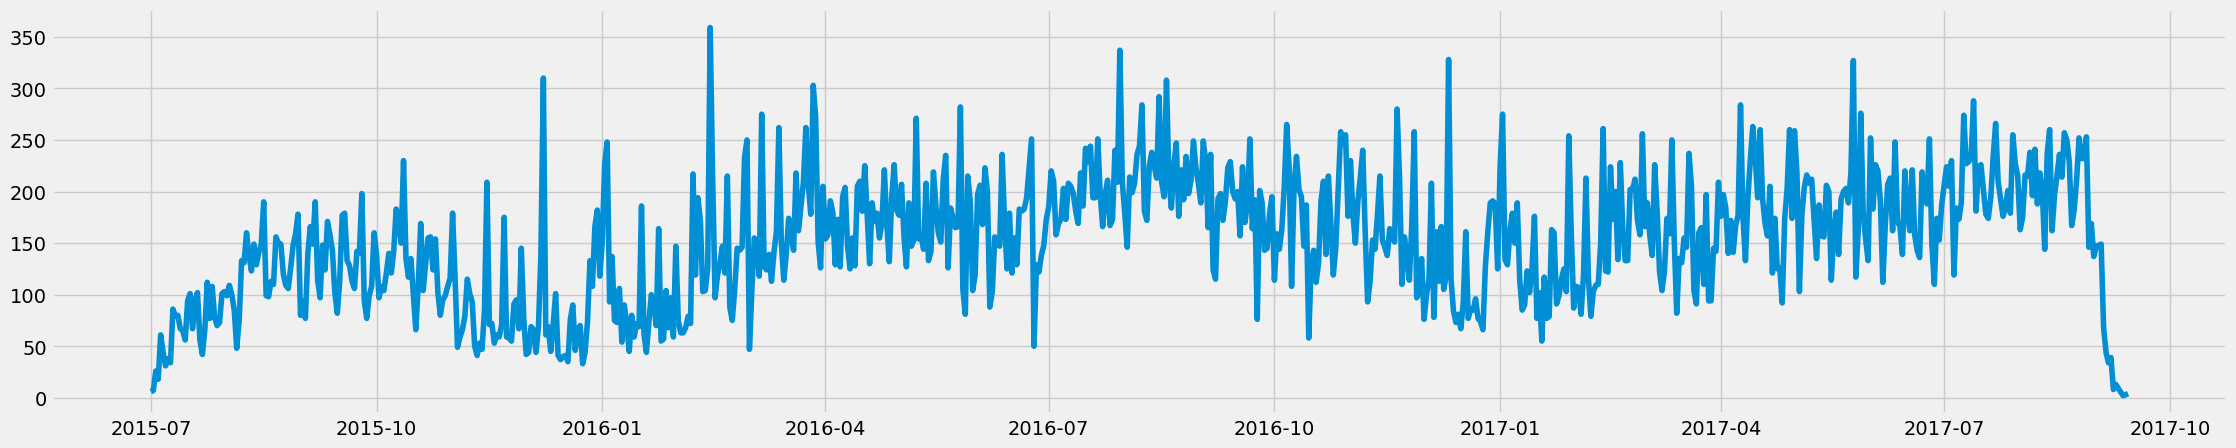

In [21]:
# Creating a line chart
plt.figure(figsize=(25,5), dpi = 100)
plt.plot(df_totalguests)

In [22]:
# Checking for missing valuse
df_totalguests.isnull().sum()

total_guests    0
dtype: int64

In [23]:
dupes = df_totalguests.duplicated()

In [24]:
dupes.sum()

557

In [25]:
dupes

datetime
2015-07-01    False
2015-07-02    False
2015-07-03    False
2015-07-04    False
2015-07-05    False
2015-07-06    False
2015-07-07    False
2015-07-08    False
2015-07-09    False
2015-07-10    False
2015-07-11    False
2015-07-12    False
2015-07-13    False
2015-07-14    False
2015-07-15    False
2015-07-16    False
2015-07-17    False
2015-07-18     True
2015-07-19     True
2015-07-20    False
2015-07-21     True
2015-07-22    False
2015-07-23    False
2015-07-24    False
2015-07-25    False
2015-07-26    False
2015-07-27    False
2015-07-28    False
2015-07-29    False
2015-07-30     True
2015-07-31    False
2015-08-01    False
2015-08-02    False
2015-08-03    False
2015-08-04    False
2015-08-05    False
2015-08-06    False
2015-08-07    False
2015-08-08    False
2015-08-09    False
2015-08-10    False
2015-08-11    False
2015-08-12    False
2015-08-13    False
2015-08-14    False
2015-08-15     True
2015-08-16    False
2015-08-17     True
2015-08-18    False
2015-08-19 

In [26]:
dupl = df_totalguests[df_totalguests.duplicated()]
dupl

,total_guests
datetime,
2015-07-18,67
2015-07-19,94
2015-07-21,56
2015-07-30,101
2015-08-15,149
2015-08-17,99
2015-08-23,149
2015-08-25,109
2015-08-31,80


In [27]:
df_totalguests

,total_guests
datetime,
2015-07-01,6
2015-07-02,7
2015-07-03,26
2015-07-04,18
2015-07-05,61
2015-07-06,44
2015-07-07,31
2015-07-08,38
2015-07-09,34


In [28]:
df_totalguests.shape

(805, 1)

- Unsure why there are duplicates in the data. Maybe because there is nothing to differentiate the data other than an index and the number of total guests?

### Time Series Analysis

In [42]:
# Decomposing Data using an additive model
decomposition = sm.tsa.seasonal_decompose(df_totalguests, model='additive', period = 365)

- The above code errored when not using period = 365, presumably because of missing index values. I chose to use period = 365 because there are 365 days in a year.

In [45]:
df_totalguests.tail(5)

,total_guests
datetime,
2017-09-08,8
2017-09-09,13
2017-09-10,9
2017-09-12,2
2017-09-14,4


In [43]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

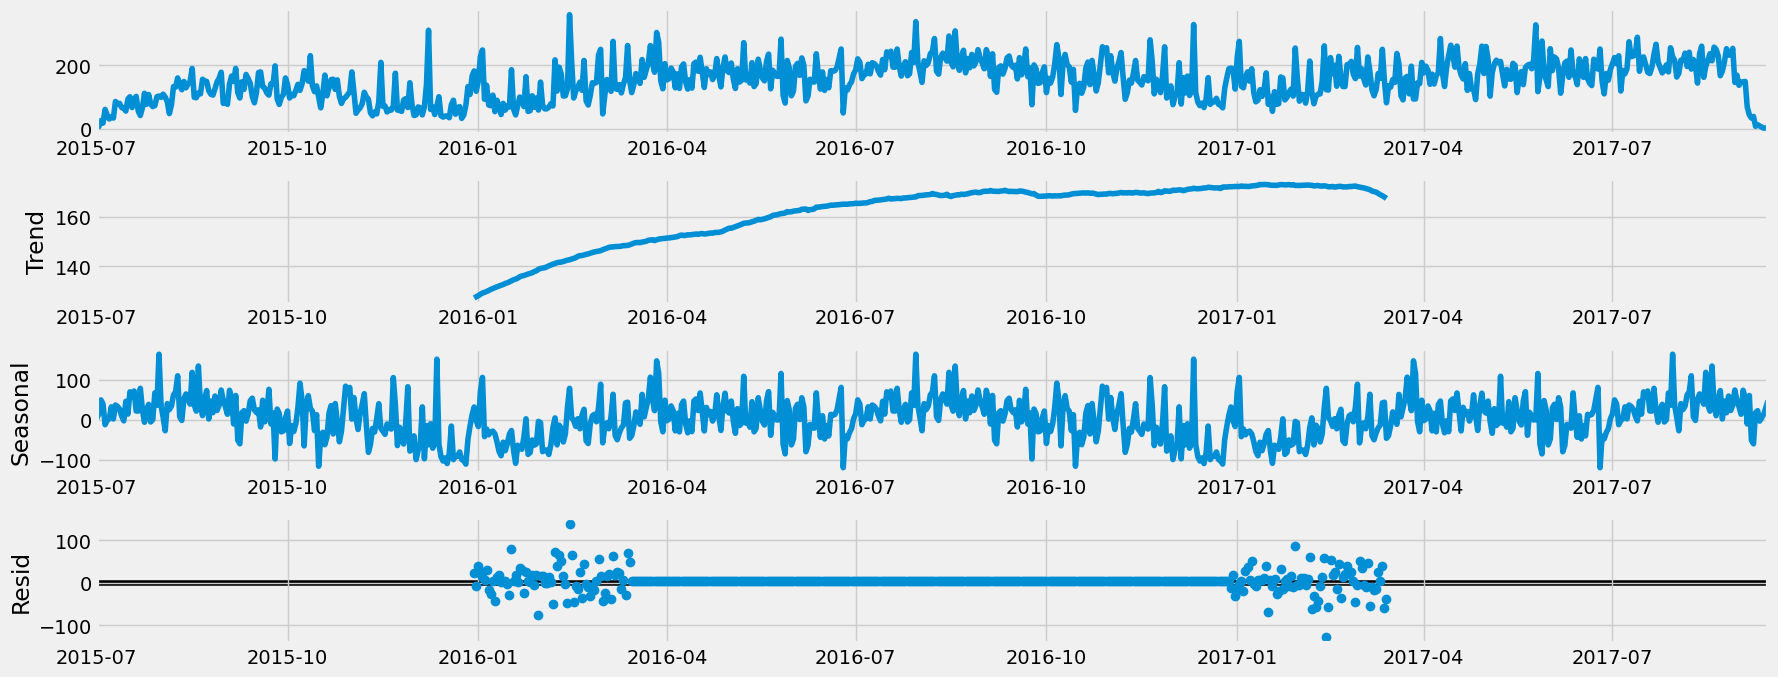

In [44]:
# Plot the separate components

decomposition.plot()
plt.show()

- Positive trend from Jan 2016 to Mar 2017. 
- Seasonality looks very similar to the initial data, possibly because I set the period to 365 days.
- Clusters of residual data in between Jan 2016 to March 2016 and Jan 2017 to Mar 2017.

### Dickey-Fuller Testing for Stationarity

In [46]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_totalguests['total_guests'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.569197
p-value                          0.099532
Number of Lags Used             21.000000
Number of Observations Used    783.000000
Critical Value (1%)             -3.438729
Critical Value (5%)             -2.865238
Critical Value (10%)            -2.568739
dtype: float64


- Assuming we are using a siginificance level of 5%, we can't reject the null hypothesis as the test statistic is larger than the 5% critical value.
- The data is non-stationary and there is a unit root in the data.

### Plotting for Autocorrelation and Stationarizing Data

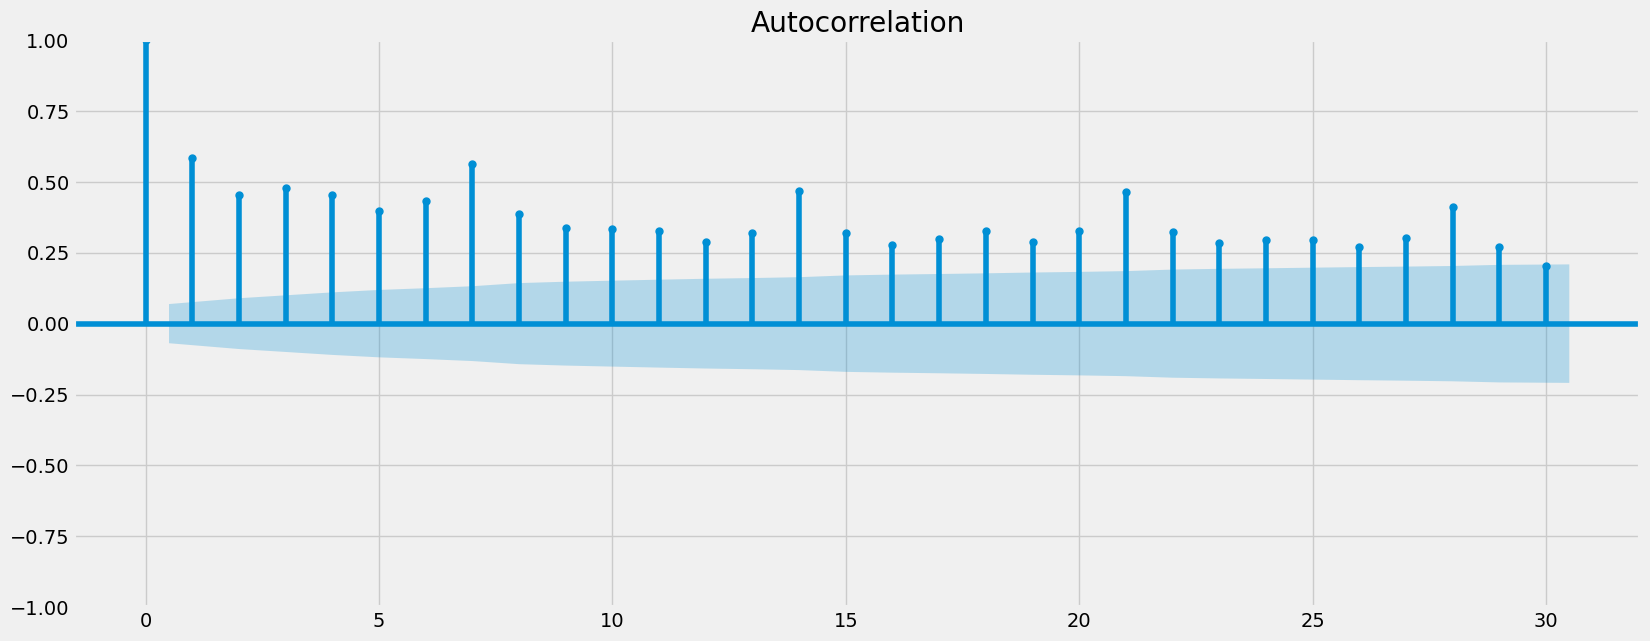

In [47]:
# Plotting for autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_totalguests)
plt.show()

In [48]:
# Stationarizing Data with differencing
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
df_tgshift = df_totalguests - df_totalguests.shift(1)

In [49]:
df_tgshift

,total_guests
datetime,
2015-07-01,NaN
2015-07-02,1.0
2015-07-03,19.0
2015-07-04,-8.0
2015-07-05,43.0
2015-07-06,-17.0
2015-07-07,-13.0
2015-07-08,7.0
2015-07-09,-4.0


In [50]:
# Drop null values
df_tgshift.dropna(inplace = True)

In [52]:
df_tgshift.head()

,total_guests
datetime,
2015-07-02,1.0
2015-07-03,19.0
2015-07-04,-8.0
2015-07-05,43.0
2015-07-06,-17.0


In [53]:
df_tgshift.columns

Index(['total_guests'], dtype='object')

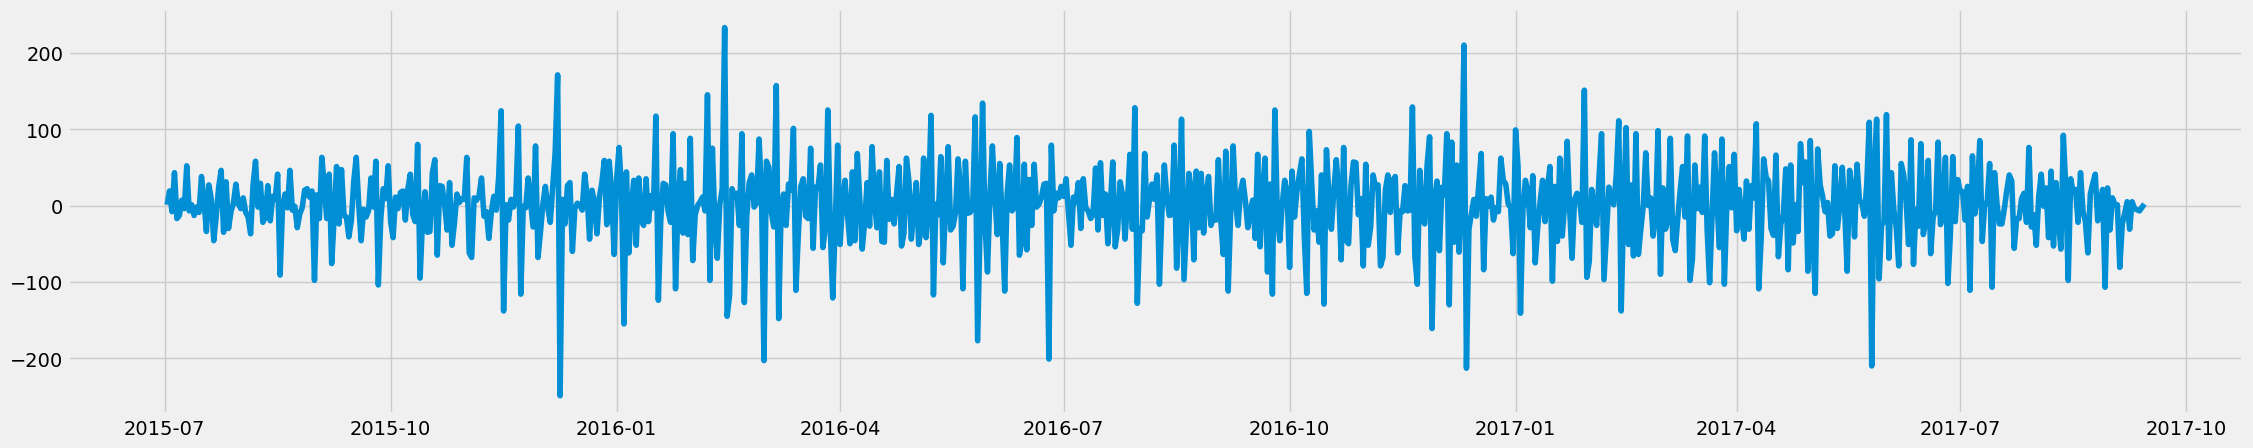

In [54]:
# Line Chart post-shift

plt.figure(figsize=(25,5), dpi=100)
plt.plot(df_tgshift)

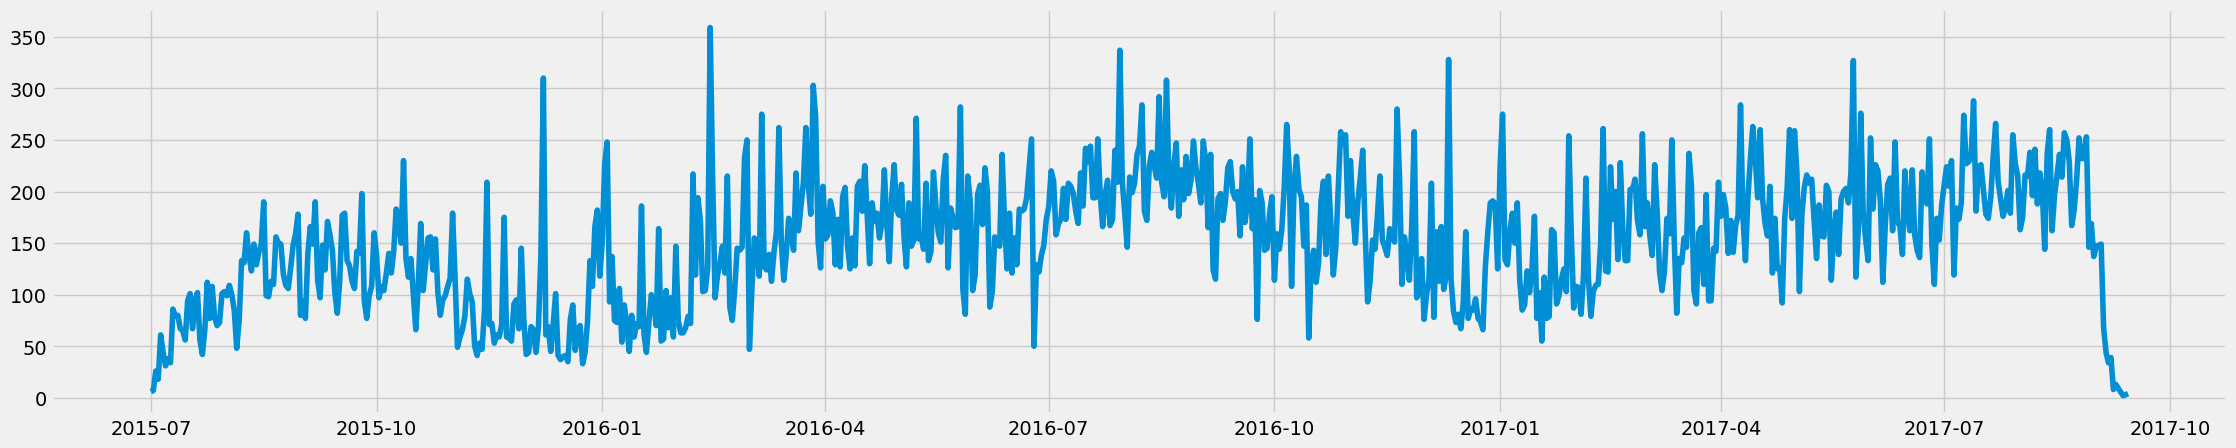

In [55]:
# Line chart pre-shift
plt.figure(figsize=(25,5), dpi = 100)
plt.plot(df_totalguests)

In [57]:
# Dickey-Fuller test for shifted data
dickey_fuller(df_tgshift['total_guests'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.559463e+00
p-value                        8.775235e-14
Number of Lags Used            2.000000e+01
Number of Observations Used    7.830000e+02
Critical Value (1%)           -3.438729e+00
Critical Value (5%)           -2.865238e+00
Critical Value (10%)          -2.568739e+00
dtype: float64


- The Test Statistic is now much smaller than the Critical Value 5%.
- The null hypothesis is rejected, and the series is stationary.

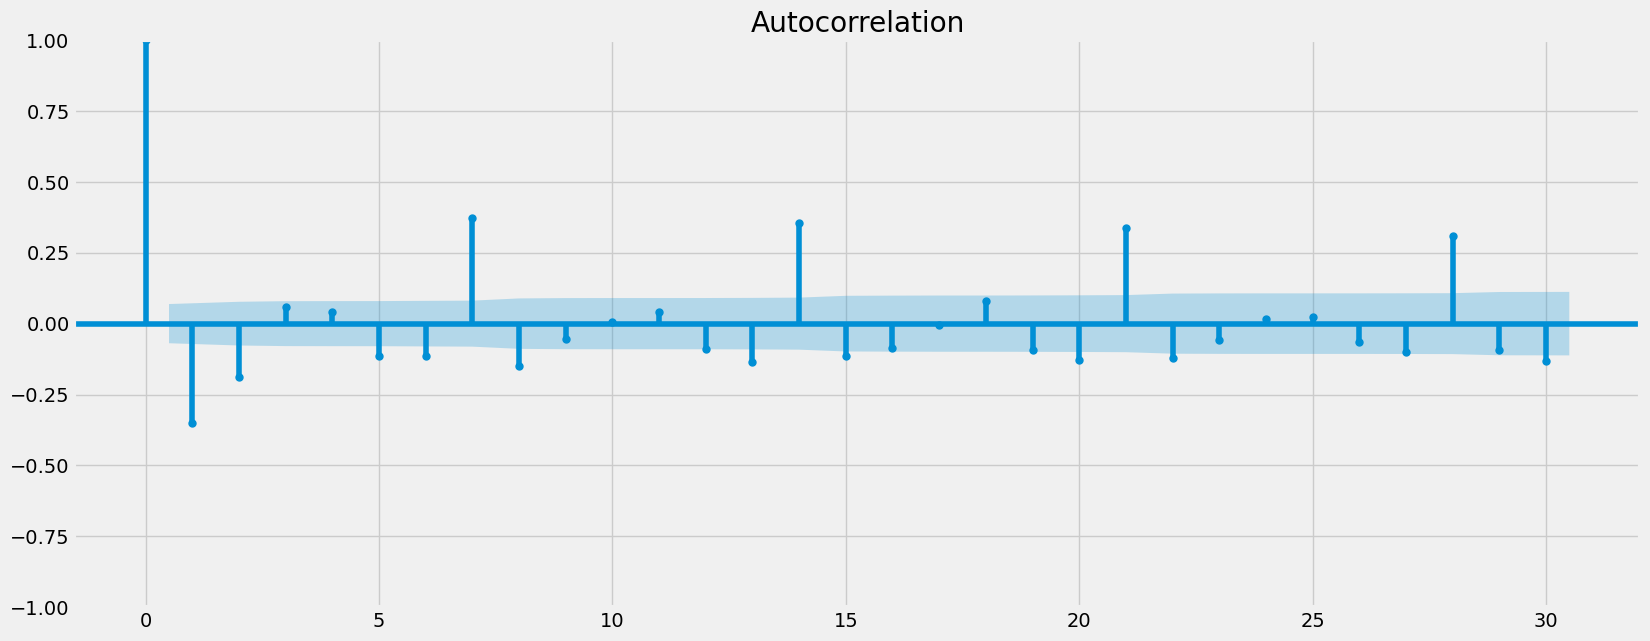

In [58]:
plot_acf(df_tgshift)
plt.show()

- The autocorrelation plot has improved, but is not perfect. There are still several lags above the confidence intervals.